## Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

### Техническое задание проведённого теста

Предыдущий аналитик проверял полное обновление дизайна сайта. Гипотеза заключается в следующем: упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта.

Параметры теста:

- название теста: `interface_eu_test`;
- группы: А (контрольная), B (новый интерфейс);
- дата набора новых пользователей: с 2020-12-01 по 2020-12-21 включительно;
- дата прохождения теста: с 2020-12-08 по 2020-12-29 включительно.

Вам нужно:

* загрузить данные теста;

* проверить корректность его проведения;

* проанализировать полученные результаты.

### Данные

- `https://code.s3.yandex.net/datasets/ab_test_participants.csv` — таблица участников тестов.
  Структура файла:

  - `user_id` — идентификатор пользователя;
  - `group` — группа пользователя;
  - `ab_test` — название теста;
  - `device` — устройство, с которого происходила регистрация.

- `https://code.s3.yandex.net/datasets/ab_test_events.zip` — архив с одним `csv`-файлом, в котором собраны события 2020 года;
  Структура файла:

  - `user_id` — идентификатор пользователя;
  - `event_dt` — дата и время события;
  - `event_name` — тип события;
  - `details` — дополнительные данные о событии.


### Как выполнить задание:

1. Опишите цели исследования.

Проанализировать влияние нового интерфейса сайта на конверсию пользователей, зарегистрировавшихся в системе, с целью выявления статистически значимого увеличения конверсии по сравнению с контрольной группой.

2. Загрузите данные, оцените их целостность.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

In [2]:
URL = 'https://code.s3.yandex.net/datasets/'
participants = pd.read_csv(URL + 'ab_test_participants.csv')
events = pd.read_csv(URL + 'ab_test_events.zip', parse_dates=['event_dt'], low_memory=False)

In [3]:
# Проверка на пропущенные значения в таблице участников
missing_participants = participants.isnull().sum()
display("Пропущенные значения в таблице участников:")
display(missing_participants[missing_participants > 0])

# Проверка на пропущенные значения в таблице событий
missing_events = events.isnull().sum()
display("Пропущенные значения в таблице событий:")
display(missing_events[missing_events > 0])

'Пропущенные значения в таблице участников:'

Series([], dtype: int64)

'Пропущенные значения в таблице событий:'

details    538264
dtype: int64

In [4]:
# Проверка на дубликаты в таблице участников
participants = participants.drop_duplicates()
duplicate_participants = participants.duplicated().sum()
display(f"Количество дубликатов в таблице участников: {duplicate_participants}")

# Проверка на дубликаты в таблице событий
events = events.drop_duplicates()
duplicate_events = events.duplicated().sum()
display(f"Количество дубликатов в таблице событий: {duplicate_events}")


'Количество дубликатов в таблице участников: 0'

'Количество дубликатов в таблице событий: 0'

In [5]:
# Проверка типов данных в таблице участников
display("Типы данных в таблице участников:")
display(participants.dtypes)
display(participants.head(5))

# Проверка типов данных в таблице событий
display("Типы данных в таблице событий:")
display(events.dtypes)
display(events.head(5))

'Типы данных в таблице участников:'

user_id    object
group      object
ab_test    object
device     object
dtype: object

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


'Типы данных в таблице событий:'

user_id               object
event_dt      datetime64[ns]
event_name            object
details               object
dtype: object

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


<div class="alert alert-info"> Проверили целостность данных, а именно проверили на дубликаты среди участников, типы данных в таблицах и пропущенные значения. В данных об участников отсутствуют дубликаты и пропуски, а в таблице событий, есть дубликаты и пропуски (один участник мог участвовать в разных событиях и тп).</div>

3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [6]:
test_participants = participants[participants['ab_test'] == 'interface_eu_test']

In [7]:
# Фильтрация участников по тесту и дате
filtered_participants = participants[
    (participants['ab_test'] == 'interface_eu_test') &
    (participants['group'].isin(['A', 'B']))
]

# Фильтрация событий по дате
filtered_events = events[
    (events['event_dt'] >= '2020-12-07') &
    (events['event_dt'] < '2020-12-30')
]

In [8]:
# Распределение пользователей по группам
group_distribution = filtered_participants['group'].value_counts()
display("Распределение пользователей по группам:")
display(group_distribution)

'Распределение пользователей по группам:'

B    5467
A    5383
Name: group, dtype: int64

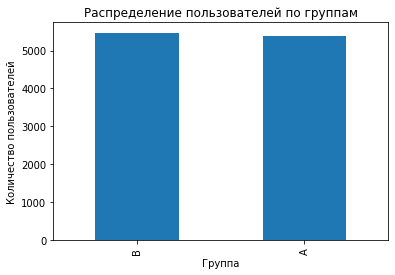

In [9]:
# Визуализация распределения пользователей по группам
group_distribution.plot(kind='bar', title='Распределение пользователей по группам')
plt.xlabel('Группа')
plt.ylabel('Количество пользователей')
plt.show()


<div class="alert alert-info">Из графика видно, что распределение равномерно c небольшим отклонением (1,5%).</div>

In [10]:
# Проверка на пересечения в группах
test_participants = participants[participants['ab_test'] == 'interface_eu_test']

# Выделение пользователей из групп A и B
group_a_users = set(test_participants[test_participants['group'] == 'A']['user_id'])
group_b_users = set(test_participants[test_participants['group'] == 'B']['user_id'])


In [11]:
# Выделение пользователей из других тестов
other_tests = participants[participants['ab_test'] != 'interface_eu_test']

# Получение уникальных user_id из других тестов
other_test_users = set(other_tests['user_id'])

# Получение уникальных user_id из теста interface_eu_test
test_users = set(test_participants['user_id'])

# Проверка пересечения
intersection_users = test_users.intersection(other_test_users)

if len(intersection_users) == 0:
    display("Нет пользователей, участвующих одновременно в тесте interface_eu_test и других тестах.")
else:
    display(f"Найдены пересечения: {len(intersection_users)} пользователей участвуют в обоих тестах.")

'Найдены пересечения: 887 пользователей участвуют в обоих тестах.'

In [12]:
# Исключение пересекающихся пользователей
filtered_participants = filtered_participants[~filtered_participants['user_id'].isin(intersection_users)]

# Проверка нового количества пользователей в тесте
new_group_distribution = filtered_participants['group'].value_counts()
display("Новое распределение пользователей по группам после исключения пересечений:")
display(new_group_distribution)

'Новое распределение пользователей по группам после исключения пересечений:'

B    5011
A    4952
Name: group, dtype: int64

In [13]:
# Проверка пересечения
intersection_users = group_a_users.intersection(group_b_users)

if len(intersection_users) == 0:
    display("Нет пользователей, участвующих одновременно в группах A и B.")
else:
    display(f"Найдены пересечения: {len(intersection_users)} пользователей участвуют в обеих группах.")

'Нет пользователей, участвующих одновременно в группах A и B.'

Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры: 

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [14]:
# Заданные параметры
p1 = 0.3  # базовый показатель конверсии
p2 = 0.33  # ожидаемое увеличение конверсии
alpha = 0.05  # уровень значимости
beta = 0.2  # мощность теста

# Критические значения
Z_alpha = norm.ppf(1 - alpha / 2)  # Z для α/2
Z_beta = norm.ppf(1 - beta)  # Z для β

# Расчет необходимого размера выборки
n = ((Z_alpha + Z_beta) ** 2 * (p1 * (1 - p1) + p2 * (1 - p2))) / (p2 - p1) ** 2
n = math.ceil(n)  # округляем до целого числа

display(f"Необходимый размер выборки для каждой группы: {n}")

'Необходимый размер выборки для каждой группы: 3760'

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [15]:
# Фильтрация участников теста
test_participants = participants[participants['ab_test'] == 'interface_eu_test']

# Получение уникальных user_id участников теста
test_user_ids = set(test_participants['user_id'])

# Фильтрация событий по user_id участников теста
filtered_events = events[events['user_id'].isin(test_user_ids)]

# Проверка результата
display(f"Количество событий после фильтрации: {filtered_events.shape[0]}")

'Количество событий после фильтрации: 73545'

- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [16]:
# Определение даты регистрации (первого события) для каждого пользователя
registration_dates = events.groupby('user_id')['event_dt'].min().reset_index()
registration_dates.columns = ['user_id', 'registration_date']

# Объединение с таблицей участников, чтобы получить только тех, кто участвовал в тесте
registration_dates = registration_dates[registration_dates['user_id'].isin(test_user_ids)]

In [17]:
# Объединение с событиями
events_with_registration = filtered_events.merge(registration_dates, on='user_id')

# Рассчет времени до события
events_with_registration['time_since_registration'] = (events_with_registration['event_dt'] - events_with_registration['registration_date']).dt.days

# Оставляем только события, произошедшие в течение первых 7 дней после регистрации
events_within_7_days = events_with_registration[events_with_registration['time_since_registration'] <= 6]

- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [18]:
# Фильтрация событий, связанных с покупками
purchase_events = events_within_7_days[events_within_7_days['event_name'] == 'purchase']

# Получение уникальных пользователей, совершивших покупку в каждой группе
purchases_a = purchase_events[purchase_events['user_id'].isin(test_participants[test_participants['group'] == 'A']['user_id'])]
purchases_b = purchase_events[purchase_events['user_id'].isin(test_participants[test_participants['group'] == 'B']['user_id'])]

# Подсчет уникальных пользователей, совершивших покупку
unique_purchases_a = purchases_a['user_id'].nunique()
unique_purchases_b = purchases_b['user_id'].nunique()

# Общее количество пользователей в каждой группе
total_users_a = test_participants[test_participants['group'] == 'A']['user_id'].nunique()
total_users_b = test_participants[test_participants['group'] == 'B']['user_id'].nunique()

# Результаты
display(f"Группа A: уникальные покупки = {unique_purchases_a}, общее количество пользователей = {total_users_a}")
display(f"Группа B: уникальные покупки = {unique_purchases_b}, общее количество пользователей = {total_users_b}")

# Расчет конверсии
conversion_a = unique_purchases_a / total_users_a
conversion_b = unique_purchases_b / total_users_b

display(f"Конверсия группы A: {conversion_a:.2%}")
display(f"Конверсия группы B: {conversion_b:.2%}")

'Группа A: уникальные покупки = 1480, общее количество пользователей = 5383'

'Группа B: уникальные покупки = 1600, общее количество пользователей = 5467'

'Конверсия группы A: 27.49%'

'Конверсия группы B: 29.27%'

- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

4. Проведите оценку результатов A/B-тестирования:

<div class="alert alert-info">Тут поидее надо написать про гипотезы. 

    H₀ (нулевая гипотеза) — Активность тестовой группы по отношению к контрольной не изменилась.

    H₁ (альтернативная гипотеза) — Активность тестовой группы по отношению к контрольной увеличилась.
</div>

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

In [19]:
success_a = unique_purchases_a  # Успешные события в группе A
success_b = unique_purchases_b  # Успешные события в группе B
n_a = total_users_a              # Общее количество пользователей в группе A
n_b = total_users_b              # Общее количество пользователей в группе B

# Проведение Z-теста для пропорций
z_stat, p_value = proportions_ztest([success_a, success_b], [n_a, n_b], alternative='smaller')

# Выводим p-value
display(f'p-value: {p_value}')

# Уровень значимости
alpha = 0.05

# Вывод результатов
if p_value < alpha:
    display("Результаты статистически значимы, отвергаем нулевую гипотезу.")
else:
    display("Нет статистически значимого различия, не отвергаем нулевую гипотезу.")

'p-value: 0.020306993983065475'

'Результаты статистически значимы, отвергаем нулевую гипотезу.'

- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

<div class="alert alert-info">  Из результатов теста видно, что альтернативная гипотеза про увеличение активности  подтвердилась, а это значит что улучшение интерфейса дало результаты, но больше чем ожидалось по прогнозам. Для принятия решения по исходам теста, было бы хорошо провести дополнительные исследования и возможно рассмотреть какие-то еще условия.</div>